In [68]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('data_with_labels.csv')

In [70]:
df

,image,class
0,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
1,/work1/niejep/SummerSchoolChallenge2022/fungii...,0
2,/work1/niejep/SummerSchoolChallenge2022/fungii...,1
3,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
4,/work1/niejep/SummerSchoolChallenge2022/fungii...,2
...,...,...
3191,/work1/niejep/SummerSchoolChallenge2022/fungii...,165
3192,/work1/niejep/SummerSchoolChallenge2022/fungii...,31
3193,/work1/niejep/SummerSchoolChallenge2022/fungii...,34
3194,/work1/niejep/SummerSchoolChallenge2022/fungii...,115


In [71]:
g = df.groupby('class')

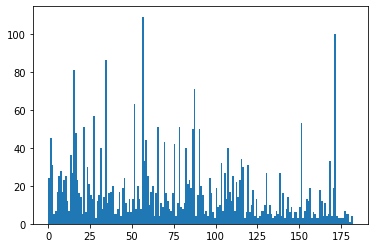

In [72]:
plt.hist(df['class'], bins=df['class'].max())
plt.show()

In [73]:
c = df['class'].to_numpy()

In [74]:
c_bins = np.bincount(c)

In [75]:
sort = np.argsort(c_bins)[::-1]

In [76]:
c_sorted = c_bins[sort]

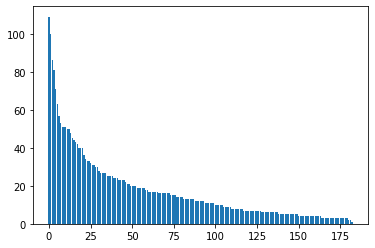

In [77]:
plt.bar(range(len(c_sorted)), c_sorted)
plt.show()

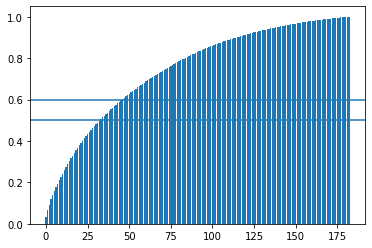

In [78]:
plt.bar(range(len(c_sorted)), np.cumsum(c_sorted) / len(df))
plt.axhline(0.5)
plt.axhline(0.6)
plt.show()

In [79]:
c[sort]

array([38, 56, 24,  6, 58, 11, 18, 84, 44, 12, 52, 55, 57,  7,  0, 40, 42,
       49, 21, 55, 11,  4, 65, 34, 39, 29, 69,  1, 66, 14,  2, 14,  5, 24,
       56, 23,  1, 34,  1, 56, 24,  0, 56,  1,  8, 14, 64, 55, 15, 27, 36,
        8, 10, 32, 61, 47, 69, 19, 88, 72, 26, 30, 42,  1,  2, 64, 47, 60,
       19, 64, 25, 43,  9, 56, 55, 20, 16, 23, 41, 10, 57,  2, 48, 73, 37,
       17, 63, 34,  5, 44, 81, 13, 89,  3, 14, 45, 69, 33, 54, 51, 41, 10,
       21, 71, 14, 81, 53, 14, 46, 21, 10, 36, 53, 48,  5, 22, 79, 86, 62,
        6, 59,  3, 27,  2, 21, 74, 75, 15, 13, 31, 14, 82, 70,  9, 80, 68,
       16, 35, 11, 16, 56, 76,  2,  9, 75, 67, 29, 28, 59, 87, 21, 48, 50,
        0, 34, 27,  8, 31, 15, 11, 19, 11, 18, 31, 78, 90, 83, 11, 77, 85,
       14, 91, 64, 86, 19, 86, 43, 67, 61, 13, 92, 42, 51], dtype=int64)

In [80]:
c_sorted

array([109, 100,  86,  81,  71,  63,  57,  53,  51,  51,  51,  50,  50,
        48,  45,  44,  43,  42,  40,  40,  40,  36,  34,  33,  33,  32,
        31,  31,  30,  30,  28,  27,  27,  27,  27,  25,  25,  25,  25,
        24,  24,  24,  23,  23,  23,  23,  22,  21,  21,  20,  20,  20,
        20,  19,  19,  19,  19,  19,  18,  18,  17,  17,  17,  17,  17,
        17,  16,  16,  16,  16,  16,  16,  16,  15,  15,  15,  15,  14,
        14,  14,  14,  13,  13,  13,  13,  13,  13,  13,  12,  12,  12,
        12,  12,  12,  11,  11,  11,  11,  11,  11,  10,  10,  10,  10,
        10,   9,   9,   9,   9,   9,   8,   8,   8,   8,   8,   8,   8,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   

In [81]:
data_sort = np.load('data_sort.npy')

In [83]:
# df = df.set_index('image')
df['image'] = df['image'].str.split('/').str[-1]
df

,image,class
0,2237852381-222754.JPG,0
1,2237852388-108.JPG,0
2,2237852964-74877.JPG,1
3,2237853192-298146.JPG,2
4,2237853950-148876.JPG,2
...,...,...
3191,2994402316-297758.JPG,165
3192,2994402327-372653.JPG,31
3193,2994403350-222575.JPG,34
3194,2994405342-372717.JPG,115


In [84]:
df_preds = pd.DataFrame({'image': data_sort['im_names'], 'pred': data_sort['pred_labels']})

In [149]:
g = df_preds.groupby('pred')

In [150]:
g.describe()

image                                   
     count unique                    top freq
pred                                         
0      395    395  2237852360-148530.JPG    1
1      359    359   2237852204-74704.JPG    1
2      369    369  2237852116-222680.JPG    1
3       13     13  2237862652-300134.JPG    1
4       21     21  2238125580-154661.JPG    1
...    ...    ...                    ...  ...
176     14     14   2238457504-91625.JPG    1
177      6      6   2238434844-90420.JPG    1
178      2      2  2831357310-209460.JPG    1
179      9      9   2237964309-79278.JPG    1
181      6      6  2238143890-155516.JPG    1

[177 rows x 4 columns]

In [157]:
pred_count = g.count()

In [165]:
pred_counts = pred_count.sort_values('image', ascending=False).head(10)
pred_counts

,image
pred,
107,2001
67,1907
51,1466
171,1270
69,1231
56,1183
75,1148
105,971
103,970


In [88]:
df_all = pd.merge(df, df_preds, on='image')
df_all

,image,class,pred
0,2237852381-222754.JPG,0,163
1,2237852388-108.JPG,0,100
2,2237852964-74877.JPG,1,107
3,2237853192-298146.JPG,2,2
4,2237853950-148876.JPG,2,2
...,...,...,...
3191,2994402316-297758.JPG,165,165
3192,2994402327-372653.JPG,31,31
3193,2994403350-222575.JPG,34,107
3194,2994405342-372717.JPG,115,115


In [96]:
from sklearn import metrics

In [97]:
m = metrics.confusion_matrix(df_all['class'], df_all['pred'])

In [114]:
np.where(m[142])

(array([ 67, 122, 142], dtype=int64),)

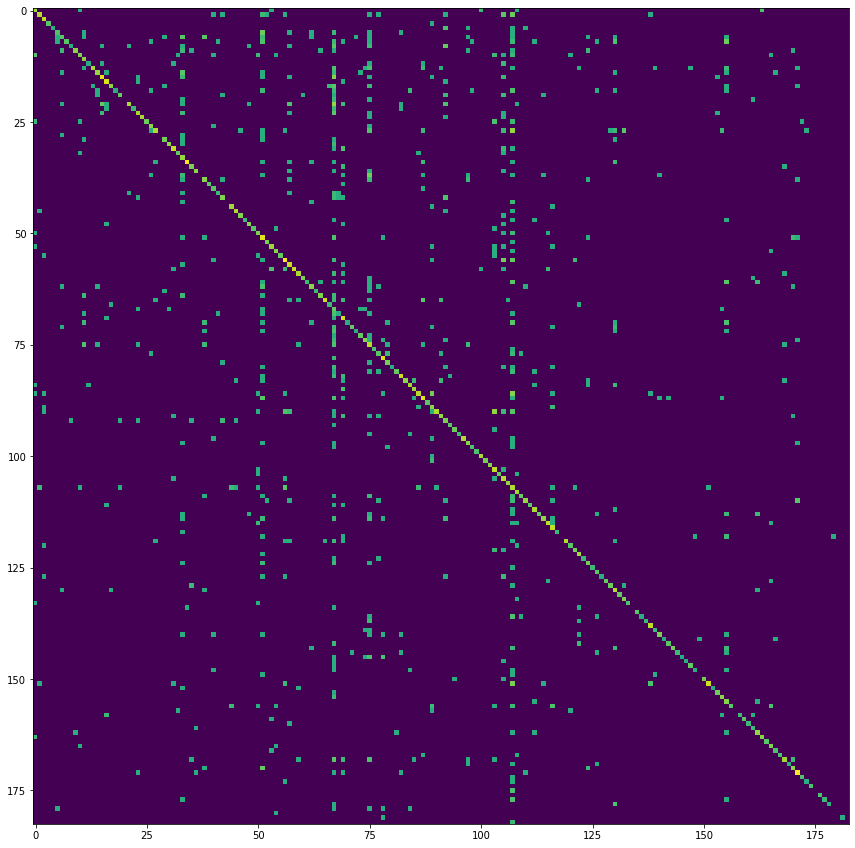

In [98]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))
ax.imshow(np.log(m + 0.0005))
plt.show()

C:\Users\nje\AppData\Local\Temp/ipykernel_25096/994953485.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.diagonal(m) / m.sum(0))


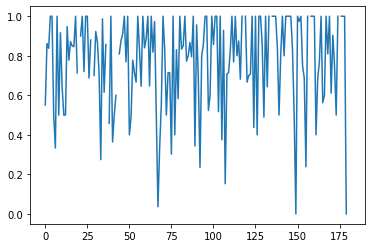

In [118]:
plt.plot(np.diagonal(m) / m.sum(0))

In [132]:
np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100

C:\Users\nje\AppData\Local\Temp/ipykernel_25096/3477649289.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.nanargmin((np.diagonal(m) / m.sum(0))[100:125]) + 100


107

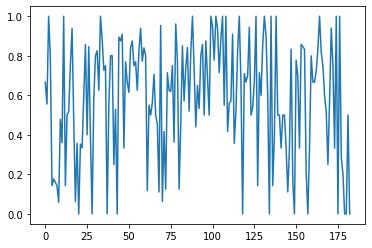

In [120]:
plt.plot(np.diagonal(m) / m.sum(1))

In [127]:
m[:, 67].sum()

137

In [133]:
m[:, 107].sum()

144

In [134]:
m[:, 75].sum()

86

In [135]:
m[:, 51].sum()

108

In [140]:
m[:, 56].sum()

108

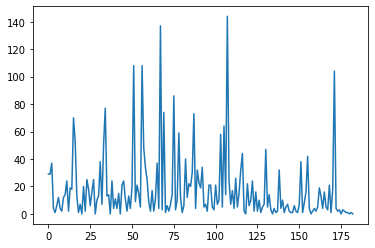

In [138]:
plt.plot(m.sum(0))

In [139]:
np.where(m.sum(0) > 100)

(array([ 51,  56,  67, 107, 171], dtype=int64),)

In [144]:
np.where(m.sum(0) / m.sum(1) > 10)

(array([67], dtype=int64),)

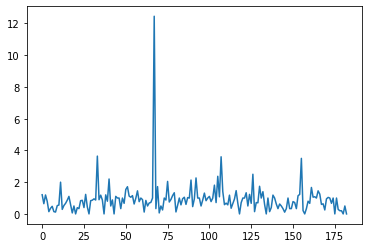

In [143]:
plt.plot(m.sum(0) / m.sum(1))

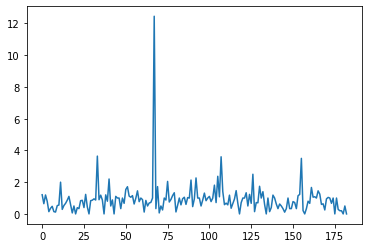

In [143]:
m.sum(0) / m.sum(1)

In [119]:
print(metrics.classification_report(df_all['class'], df_all['pred']))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        24
           1       0.86      0.56      0.68        45
           2       0.84      1.00      0.91        31
           3       1.00      0.80      0.89         5
           4       1.00      0.14      0.25         7
           5       0.50      0.18      0.26        17
           6       0.33      0.16      0.22        25
           7       1.00      0.14      0.25        28
           8       0.50      0.06      0.11        17
           9       0.92      0.48      0.63        23
          10       0.64      0.36      0.46        25
          11       0.50      1.00      0.67        12
          12       0.50      0.14      0.22         7
          13       0.95      0.50      0.65        36
          14       0.78      0.52      0.62        27
          15       0.87      0.75      0.81        81
          16       0.85      0.94      0.89        48
          17       0.85    

C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nje\Miniconda3\envs\MachineLearning\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu